<a href="https://colab.research.google.com/github/jooney-ai/jooney-ai/blob/main/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C(%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 배달의민족 도현체(한글폰트) // 코랩은 한글지원 x 그림그릴때 깨질수있음

import pandas as pd
import time
import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np
from PIL import Image  #  이미지데이터 불러오고 처리하는 라이브러리

In [ ]:
from tqdm import tqdm  #  얼마나 진행됐는지 퍼센트로 알려주는 라이브러리

total = []

for n in tqdm(range(1 , 3992 , 10)):  # 페이지가 10씩 증가하므로 총 400 페이지

    url = requests.get("https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=25&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}".format(n))
    html = bs(url.text)
    news = html.find('ul',class_='list_news').find_all('li',class_='bx')

    for i in news:
        title = i.find('a',class_='news_tit').text   # 뉴스 타이틀 (텍스트)
        content = i.find('a',class_='api_txt_lines dsc_txt_wrap').text   # 요약 (텍스트)
        total.append([title,content])   # 2개 (제목, 요약) or 리스트 안에 리스트?

    time.sleep(1)

100%|██████████| 400/400 [12:57<00:00,  1.94s/it]


In [ ]:
len(total)   # 제목 2천개 , 요약 2천개?

4000

In [ ]:
df = pd.DataFrame(total, columns = ['제목','요약'])   # 첫 리스트에 제목, 두번째 리스트에 요약
df

,제목,요약
0,"GM, 한국에 20년간 9조원 이상 투자했다","미국의 자동차 기업 제너럴 모터스(General Motors, 이하 GM)가 한국 ..."
1,"美, '전략자산 상시배치' 묻자 ""주한미군 주둔이 한국방위 약속""(종합)",이것이 한국 방위에 대한 미국의 약속이라고 언급했다. 패트릭 라이더 미 국방부 대변...
2,"미 ""전략자산 상시배치? 주한미군이 한국방위 약속""",주한미군이 한국을 지킬 거라며 부정적 시각을 보였습니다. 워싱턴에서 김윤수 특파원입...
3,"美 냉동공조설비 인증, 이제 한국서 받는다…시간·비용 절감",기사내용 요약 인천 한국공기과학시험연구원 개원 AHRI 한국시험소…아시아 두 번째 ...
4,"美전문가 “한국 핵무장 반대, 나토식 핵공유 논의는 가능”",미국 싱크탱크 헤리티지재단이 한국의 자체 핵무장이나 전술핵무기 재배치에 부정적인 견...
...,...,...
3995,"""질타에 또 질타"" 이병호 한국농어촌공사 사장 진땀 뺀 사연",이런 가운데 일요서울은 지난 17일 진행된 한국농어촌공사의 국정감사에 주목했다. 이...
3996,"[2022 국정감사] 한국주택금융공사 전세보증, 지방보다 '수도권·고신용자'에...","서민들을 위해 쓰여야 할 한국주택금융공사의 전세보증이 지방보다는 수도권, 그리고 중..."
3997,"한국지방세연구원, ""공시가격 현실화로 재산세 부담 제고 정책 한계 있다""",19일 한국지방세연구원은 '공시가격 현실화가 주택 재산세에 미친 영향과 시사점' 보...
3998,"한국유나이티드제약, 한국-베트남 수교 30주년 기념 가족음악회 성료",지난 14일 베트남 호치민 국립음악원에서 열린 '2022년 한국-베트남 수교 30주...


In [ ]:
#  빈도분석

import re

text = ''   # 리스트내용 텍스트화 하기

for i in total:
    text += i[0]   # 제목 넣기
    text += '\n'   # 엔터?
    text += i[1]
    text += '\n'

len(text)

617582

In [ ]:
text

'GM, 한국에 20년간 9조원 이상 투자했다\n미국의 자동차 기업 제너럴 모터스(General Motors, 이하 GM)가 한국 출범 이후 20년간 9조원 이상을 투자한 것으로 나타났다. GM은 19일 창원공장에서 한국 출범 20주년 기념식을 개최했다. 이날 GM은 최근 창원공장에...\n美, \'전략자산 상시배치\' 묻자 "주한미군 주둔이 한국방위 약속"(종합)\n이것이 한국 방위에 대한 미국의 약속이라고 언급했다. 패트릭 라이더 미 국방부 대변인은 이날 브리핑에서 한국 방어를 위해 미 전략자산이 상시배치되어야 한다고 보느냐는 질문에 "이미 2만8천 명 이상의 미군이...\n미 "전략자산 상시배치? 주한미군이 한국방위 약속"\n주한미군이 한국을 지킬 거라며 부정적 시각을 보였습니다. 워싱턴에서 김윤수 특파원입니다. <기자> 미... 미군이 한국 방위에 대한 약속이라고 즉답을 피했습니다. [패트릭 라이더/미 국방부 대변인 :\xa0이미 2만 8천 명...\n美 냉동공조설비 인증, 이제 한국서 받는다…시간·비용 절감\n기사내용 요약 인천 한국공기과학시험연구원 개원 AHRI 한국시험소…아시아 두 번째 공조설비 인증 시간 2주 이상 단축 [서울=뉴시스] 김성진 기자 = 냉동공조 제품 수출에 필수로 여겨지는 미국냉동공조협회(AHRI)...\n美전문가 “한국 핵무장 반대, 나토식 핵공유 논의는 가능”\n미국 싱크탱크 헤리티지재단이 한국의 자체 핵무장이나 전술핵무기 재배치에 부정적인 견해의 보고서를... 고도화가 한국, 일본, 미국에 큰 위협이 되고 있다고 진단했다. 특히 “북한의 새로운 무기는 이전의 단점을...\n“창원·부평공장, 내년 풀가동”… 한국GM, 연간 50만대 생산 목표\n창원공장에서 한국 출범 20주년 기념식 한국 진출 20주년을 맞은 미국 제너럴모터스(GM)가 국내 생산 규모를 연간 50만대로 끌어올리겠다고 발표했다. 현재 25만대 수준인 연간 생산량을 내년 두 배 수준으로 끌어올려...\n한국, 카타르 월드컵서 조별리그 3경기 전부 빨강색 유니폼 입

In [ ]:
re.findall("[가-힣]{2,}",text)   # 2글자 이상 한글찾기

['한국에',
 '년간',
 '조원',
 '이상',
 '투자했다',
 '미국의',
 '자동차',
 '기업',
 '제너럴',
 '모터스',
 '이하',
 '한국',
 '출범',
 '이후',
 '년간',
 '조원',
 '이상을',
 '투자한',
 '것으로',
 '나타났다',
 '창원공장에서',
 '한국',
 '출범',
 '주년',
 '기념식을',
 '개최했다',
 '이날',
 '최근',
 '창원공장에',
 '전략자산',
 '상시배치',
 '묻자',
 '주한미군',
 '주둔이',
 '한국방위',
 '약속',
 '종합',
 '이것이',
 '한국',
 '방위에',
 '대한',
 '미국의',
 '약속이라고',
 '언급했다',
 '패트릭',
 '라이더',
 '국방부',
 '대변인은',
 '이날',
 '브리핑에서',
 '한국',
 '방어를',
 '위해',
 '전략자산이',
 '상시배치되어야',
 '한다고',
 '보느냐는',
 '질문에',
 '이미',
 '이상의',
 '미군이',
 '전략자산',
 '상시배치',
 '주한미군이',
 '한국방위',
 '약속',
 '주한미군이',
 '한국을',
 '지킬',
 '거라며',
 '부정적',
 '시각을',
 '보였습니다',
 '워싱턴에서',
 '김윤수',
 '특파원입니다',
 '기자',
 '미군이',
 '한국',
 '방위에',
 '대한',
 '약속이라고',
 '즉답을',
 '피했습니다',
 '패트릭',
 '라이더',
 '국방부',
 '대변인',
 '이미',
 '냉동공조설비',
 '인증',
 '이제',
 '한국서',
 '받는다',
 '시간',
 '비용',
 '절감',
 '기사내용',
 '요약',
 '인천',
 '한국공기과학시험연구원',
 '개원',
 '한국시험소',
 '아시아',
 '번째',
 '공조설비',
 '인증',
 '시간',
 '이상',
 '단축',
 '서울',
 '뉴시스',
 '김성진',
 '기자',
 '냉동공조',
 '제품',
 '수출에',
 '필수로',
 '여겨지는',
 '미국냉동공조협회',
 '전문가',
 '한국',
 '핵무장

In [ ]:
box = re.findall("[가-힣]{2,}",text)
len(box)

111663

In [ ]:
# 빈도수 체크

dic = {}

for i in box:
    if i in dic:
        dic[i] += 1
    else:
        dic[i] = 1

dic

{'한국에': 119,
 '년간': 43,
 '조원': 24,
 '이상': 45,
 '투자했다': 2,
 '미국의': 73,
 '자동차': 12,
 '기업': 94,
 '제너럴': 22,
 '모터스': 21,
 '이하': 222,
 '한국': 2307,
 '출범': 123,
 '이후': 91,
 '이상을': 8,
 '투자한': 12,
 '것으로': 178,
 '나타났다': 41,
 '창원공장에서': 68,
 '주년': 183,
 '기념식을': 37,
 '개최했다': 39,
 '이날': 136,
 '최근': 166,
 '창원공장에': 9,
 '전략자산': 13,
 '상시배치': 11,
 '묻자': 6,
 '주한미군': 12,
 '주둔이': 11,
 '한국방위': 9,
 '약속': 26,
 '종합': 46,
 '이것이': 5,
 '방위에': 12,
 '대한': 320,
 '약속이라고': 6,
 '언급했다': 5,
 '패트릭': 11,
 '라이더': 14,
 '국방부': 37,
 '대변인은': 16,
 '브리핑에서': 10,
 '방어를': 11,
 '위해': 243,
 '전략자산이': 8,
 '상시배치되어야': 5,
 '한다고': 14,
 '보느냐는': 7,
 '질문에': 24,
 '이미': 22,
 '이상의': 16,
 '미군이': 8,
 '주한미군이': 10,
 '한국을': 86,
 '지킬': 2,
 '거라며': 1,
 '부정적': 19,
 '시각을': 5,
 '보였습니다': 1,
 '워싱턴에서': 1,
 '김윤수': 1,
 '특파원입니다': 1,
 '기자': 178,
 '즉답을': 2,
 '피했습니다': 1,
 '대변인': 2,
 '냉동공조설비': 10,
 '인증': 12,
 '이제': 17,
 '한국서': 43,
 '받는다': 11,
 '시간': 35,
 '비용': 7,
 '절감': 8,
 '기사내용': 39,
 '요약': 39,
 '인천': 58,
 '한국공기과학시험연구원': 69,
 '개원': 28,
 '한국시험소': 2,
 '아시아': 64,
 '번째'

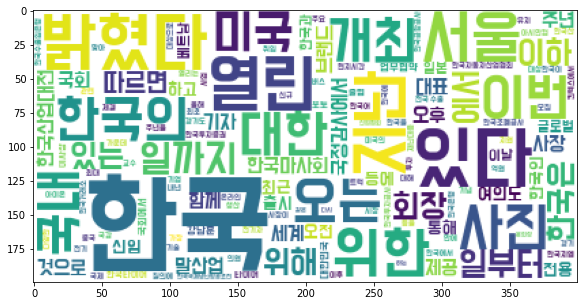

In [ ]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color = 'white')

plt.figure(figsize = (10,5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

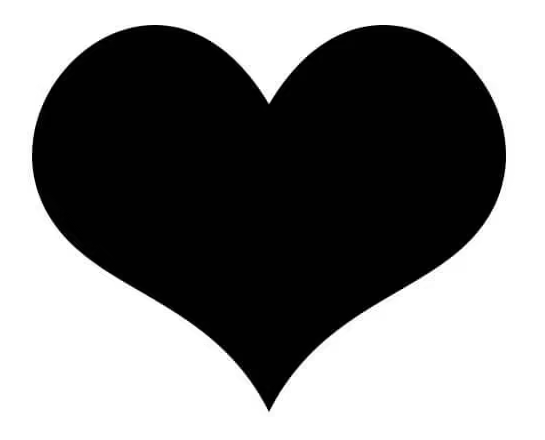

In [ ]:
img = Image.open("하트.png")
img

In [ ]:
img = np.array(img)  #  흰색에 가까울수록 255 , 0 에 가까울수록 검은색
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

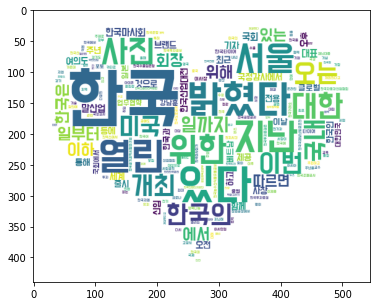

In [ ]:
wc = WordCloud(font_path = "BMDOHYEON_ttf.ttf",
               background_color = 'white' , mask = img)

plt.figure(figsize = (10,5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [ ]:
#  ? 빈도수에 따라 나열 sort 로 많이 나온순부터 5 개 까지 슬라이싱